$\Large{\text{This demonstrates how computer arithmetic is weird to the human eye}}$

$\Large{\text{This is how a computer stores 1e5 as a floating point}}$

In [1]:
1e5

100000.0



$\Large{\text{Now this is how 1e-10 is stored in a computer}}$


In [2]:
1e-10  

1e-10

$\Large{\text{Lets do some math and show how things can go "wrong" from a mathematical perspective}}$

$\Large{\text{This should be adding and subtracting the same quantity, so both sides should be equal}}$

In [3]:
1e-10 + 1e5 - 1e5 == 1e-10

False

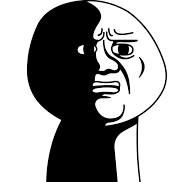

$\Large{\text{Okay... well that is not really what we anticipated.  The answer, mathematically, SHOULD be 1e-10.}}$

$\Large{\text{Let's try some trig functions... sin(2 pi ) = 0.  \Large {Right?!  \Huge{RIGHT!? }}}}$

In [4]:
import math
math.sin(2*math.pi)==0

False

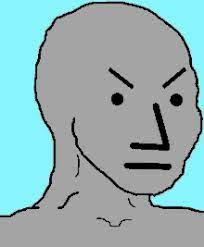


$\Large{\text{Well, what is the answer then python?!}}$

In [5]:
import math
math.sin(2*math.pi)

-2.4492935982947064e-16

$\Huge{\Huge{ \text{Taylor series:  If $f$  is infinitely differentiable then its Taylor Series centered around the point $x_0$ exists.}}}$

 
 $\begin{equation}
 \Huge { f(x) = \sum_{n=0}^{\infty} \frac{f^{(n)}(x_0)}{n!} (x - x_0)^n}
 \end{equation}$
 

$\Huge{\text{Lets show that the partial sum estimates the function}}$

$\Huge{\text{Define the partial sum, a truncated version of the Taylor series, $P_N$, as follows}}$

\begin{equation}
  \Huge {P_N(x) =\sum_{n=0}^{N} \frac{f^{(n)}(x_0)}{n!} (x - x_0)^n }
\end{equation}



$\Huge{\Huge{ \text{Note that $P_N(x) \neq f(x)$, it only approximates it, $P_N(x) \approx f(x)$. }}}$
$\Huge{\Huge{ \text{The remainder function $R_N(x(\zeta)) $. is needed to complete, or make it exact, the function}} }$
\begin{equation}
\Huge{\Huge{ f(x) = R_N(x) + P_N(x)} }
\end{equation}

$\Huge{\text{Lets dive into the example with $f(x) = \text{exp}(x)$, where $x_0=0$ for $P_0, P_1, P_2$}}$

$\Large{P_0(x) = 1}$

$\Large{P_1(x) = 1 + x= P_0(x) + x}$

$\Large{P_2(x) = 1 + x+ \frac{x^2}{2}= P_1(x) + \frac{x^2}{2} }  $

$\Large{\text{Now let's plot them against each other}}$

1.0

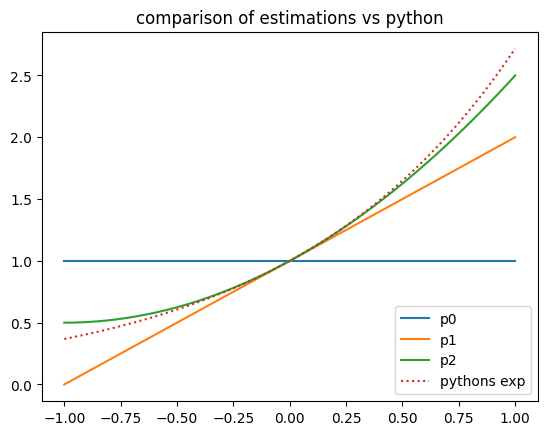

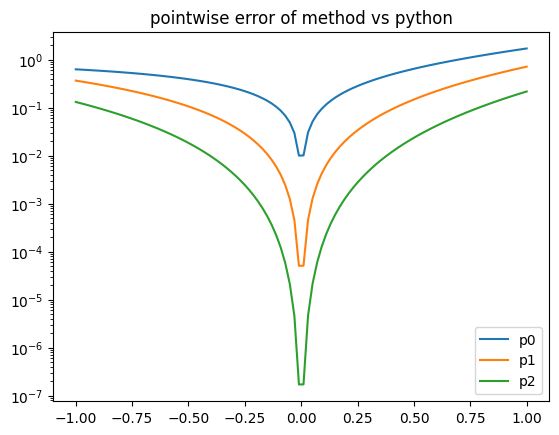

In [6]:
import math
import numpy as np 
import matplotlib.pyplot as plt 
def p0(x) : 
    return x/x
    
def p1(x) : 
    return p0(x) + x
    
def p2(x) : 
    return p1(x) + x*x/2


display (p0(1) )
x = np.linspace(-1, 1, 100) 
plt.plot(x, p0(x), label='p0') 
plt.plot(x, p1(x), label='p1') 
plt.plot(x, p2(x), label='p2') 
plt.plot(x, np.exp(x), linestyle='dotted', label='pythons exp')
plt.legend(loc="lower right")
plt.title("comparison of estimations vs python")
plt.show() 

plt.plot(x, abs(p0(x)-np.exp(x)), label='p0') 
plt.plot(x, abs(p1(x)-np.exp(x)), label='p1') 
plt.plot(x, abs(p2(x)-np.exp(x)), label='p2') 
plt.yscale("log")
plt.legend(loc="lower right")
plt.title("pointwise error of method vs python")
plt.show() 

$\Large{\text{Now lets try another example with a trig function, tan(x).  Lets center it at 0 again for simplicity}}$
$\Large{\frac{d}{dx} \text{tan}(x) = \text{sec}^2(x)}$

$\Large{\frac{d^2}{dx^2} \text{tan}(x) = 2 \text{tan}(x)\text{sec}(x)}$

$\Large{\frac{d^3}{dx^3} \text{tan}(x) = 2 \text{sec}^2(x) (\text{sec}^2(x) + 2 \text{tan}^2(x))}$



0

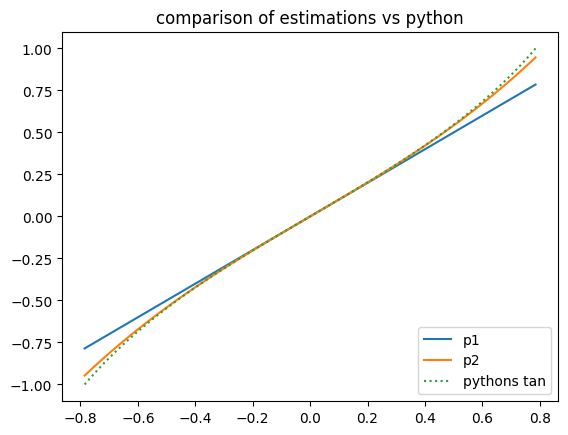

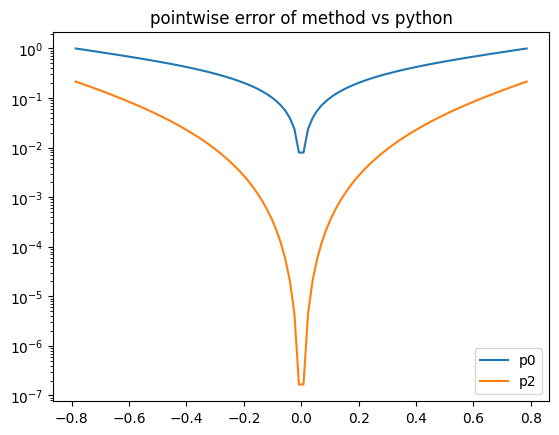

In [7]:
import math
import numpy as np 
import matplotlib.pyplot as plt 
def p0(x) : 
    return 0
    
def p1(x) : 
    return p0(x) + x
    
def p2(x) : 
    return p1(x) + 0

def p3(x) :
    return p2(x) + x*x*x/3

display (p0(1) )
x = np.linspace(-np.pi/4, np.pi/4, 100) 
plt.plot(x, p1(x), label='p1') 
plt.plot(x, p3(x), label='p2') 
plt.plot(x, np.tan(x), linestyle='dotted', label='pythons tan')
plt.legend(loc="lower right")
plt.title("comparison of estimations vs python")
plt.show() 

plt.plot(x, abs(p0(x)-np.tan(x)), label='p0')  
plt.plot(x, abs(p2(x)-np.tan(x)), label='p2') 
plt.yscale("log")
plt.legend(loc="lower right")
plt.title("pointwise error of method vs python")
plt.show() 

$\Large{\text{Moral of the story?}}$

$\Large{\text{More terms means more \Huge{Accuracy} }}$